In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading the file
df=pd.read_excel('TermDeposit.xlsx')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [5]:
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [6]:
# shows (columns,rows)
df.shape

(45211, 17)

In [7]:
# shows all the columns with value counts(object values)
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


# EDA
# 1.find unwanted columns
# 2.find missing values
# 3.find features with one value
# 4.explore the catagorical features
# 5.find catagorical feature distribution
# 6.relationship between catagorical features and label
# 7.explore the numerical features
# 8.find discrete numerical features
# 9.relation between discrete numerical features and labels
# 10.find continous numerical features
# 11.distribution of continous numerical features
# 12.relation between continous numerical features and labels
# 13.find outliers in numerical features
# 14.explore co-relation between numerical features
# 15.find pair plot
# 16.check the data set is balanced or not based on target value is classification

# 1.find unwanted columns

 data taken from (may 2008 to november 2010)
 
age-(numerical data)-(keep-it)

job-type of job-(catagorical data)(keep-it)

maritial-status:single,married,divorced (catagorical data)(keep-it)

education-unknown,primary,secondary,tertiary (catagorical data)(keep-it)

default:the credits given to the costumer by the bank (yes/no) (binary)(keep-it)

balance: average yearly balance in the account in euros-(give some range of values divide them into 2or3 catagories)(numerical data)-(keep-it)

housing-has house loan or notin past yes/no (binary)(keepit)

loan-has personal loan or not yes/no (binary)-keep it(keepit)

contact-(unknown-face contact,telephone-landline,cellular-mobile no.)(catagorical)(keep it)

day-last time in touch (date)(numerical)(keepit)

month-last time in touch (month)(catagorical)(keepit)

duration-last time contact since than,in (seconds)(numerical)(keepit)

campaign-no.of time employee contacted costumer(numerical data)(keep it)

pdays-days passed after the employee contacted the costumer (numeric) if,"-1" the costumer is not cantacted at least once(keep it)

previous-how many times the employee contacted the costumer(numeric)(keep it)

poutcome-same costumer sucsess or not in last campaign (unknown,failur,sucsess)(keep it)

y-client taken the deposit or not  (yes/no)(binary)(keep it)(target variable)

# there is no unwanted column

# 2.find missing values

In [8]:
# fetching NAN values
df.isnull().sum() 
# no missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# Calculate the percentage of missing values for each column
percentage_missing_values = df.apply(lambda x: (x.isnull().sum() / len(x)) * 100)

print("Percentage of Missing Values:")
print(percentage_missing_values)

Percentage of Missing Values:
age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


# 3.find features with one value

In [10]:
# unique value counts in each coloum
for column in df.columns:
    print(column,df[column].nunique()) #no feature with one-value

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


# 4.explore the catagorical features

In [11]:
df_cat = df.select_dtypes(include='object') #fetches all the catagorical values

In [12]:
df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


# 5.find catagorical feature distribution

In [13]:
# catagorical columns fetching all the object datatypes
catagorical_data=[col for col in df.select_dtypes(include='object').columns if (col not in ['y'])]
print(catagorical_data)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


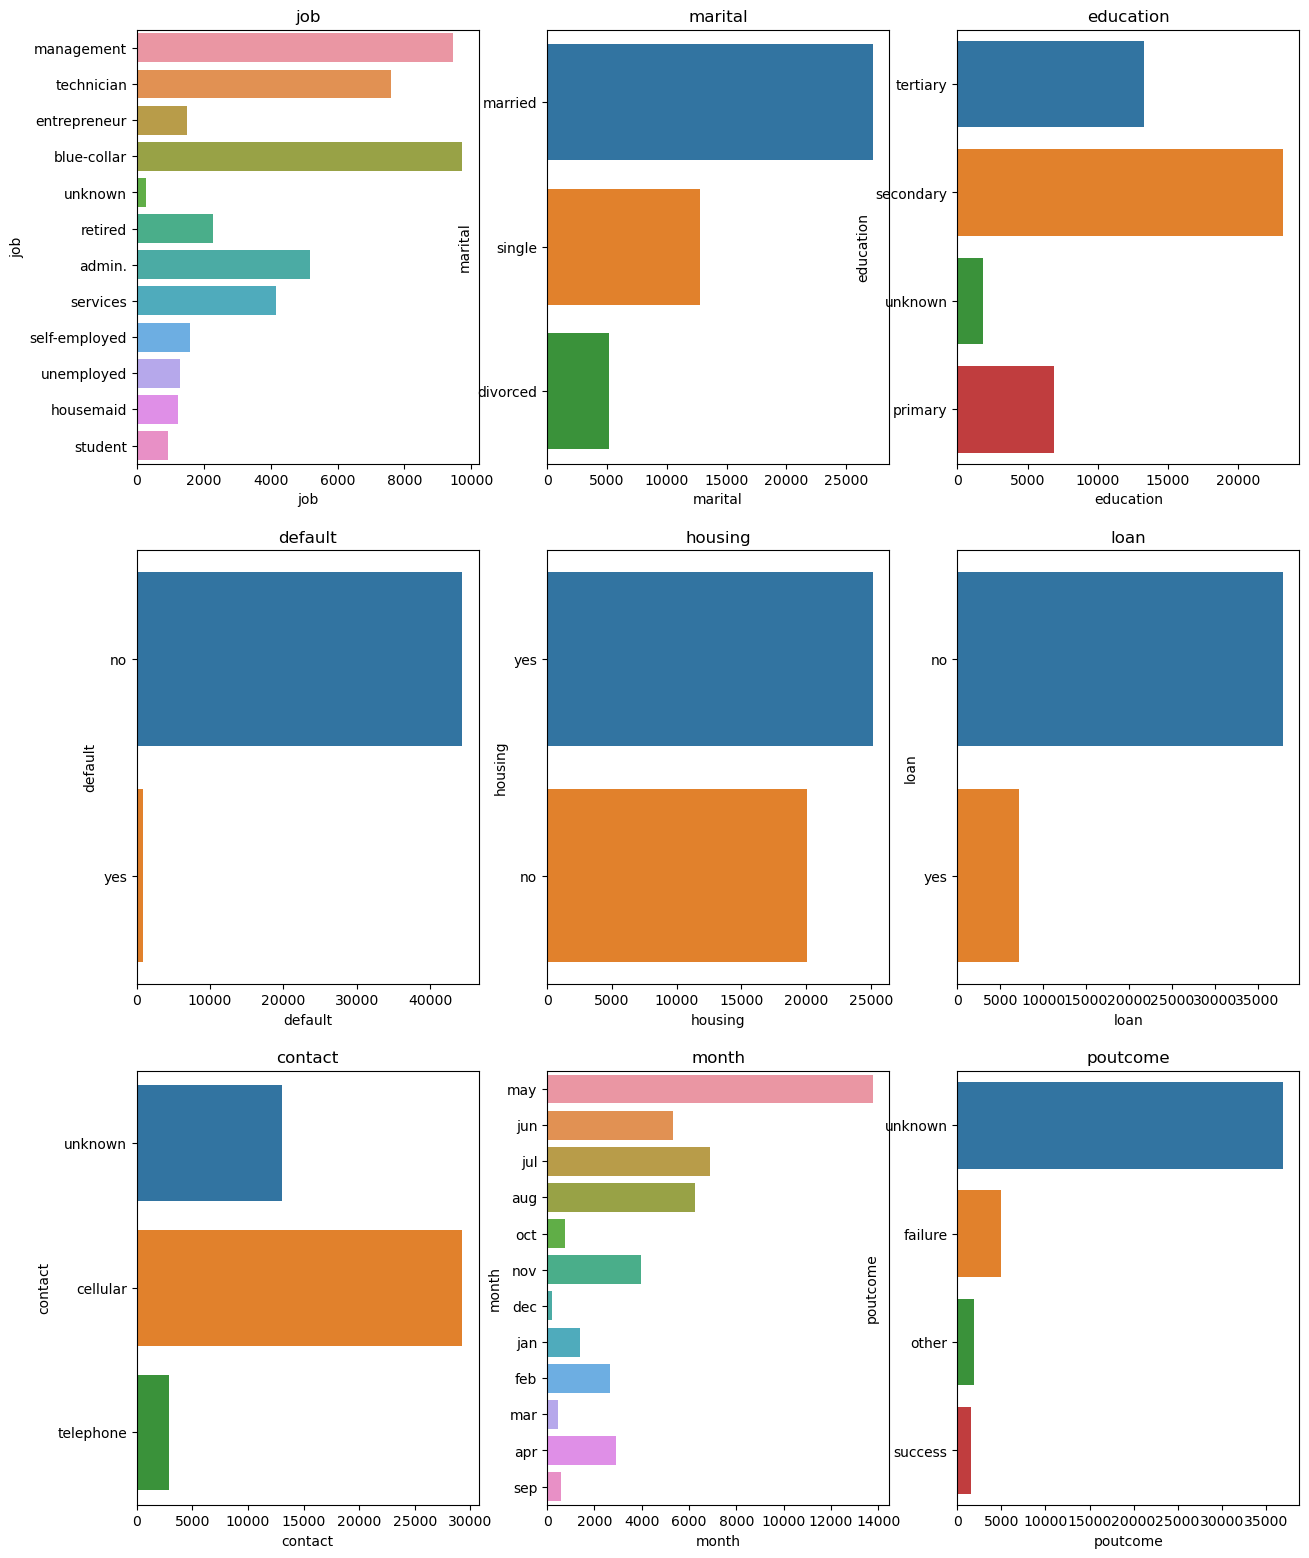

In [14]:
# checking all the catagorical values with plotting
plt.figure(figsize=(15,80), facecolor='white')
plotnumber=1
for catagorical_data in catagorical_data:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=catagorical_data,data=df)
    plt.xlabel(catagorical_data)
    plt.title(catagorical_data)
    plotnumber+=1
plt.show()

key insights from plotting is

1.from job,the blue-collars are mostly contacted,followed by managment.

2.from maritial,married persons are mostly contacted.

3.from education,the persons who completed secondary education are been contacted more.

4.from default,the persons who has credits from their bank are very less(in the contacted list).

5.from housing,most of the people who are contacted has house loans.

6.from loan,most of them dose not have personal loan,who are contacted.

7.from contact,most of the people who were bank contacted,most of them contain mobile phones.

8.from month,the bank employyes contacted to take the term deposit,the graph usually increased to contact most.no.of people in may month.

9.from poutcome,if a member survey is happening the person did not give particular feedback,thus the unknown is high.

# 6.relationship between catagorical features and label

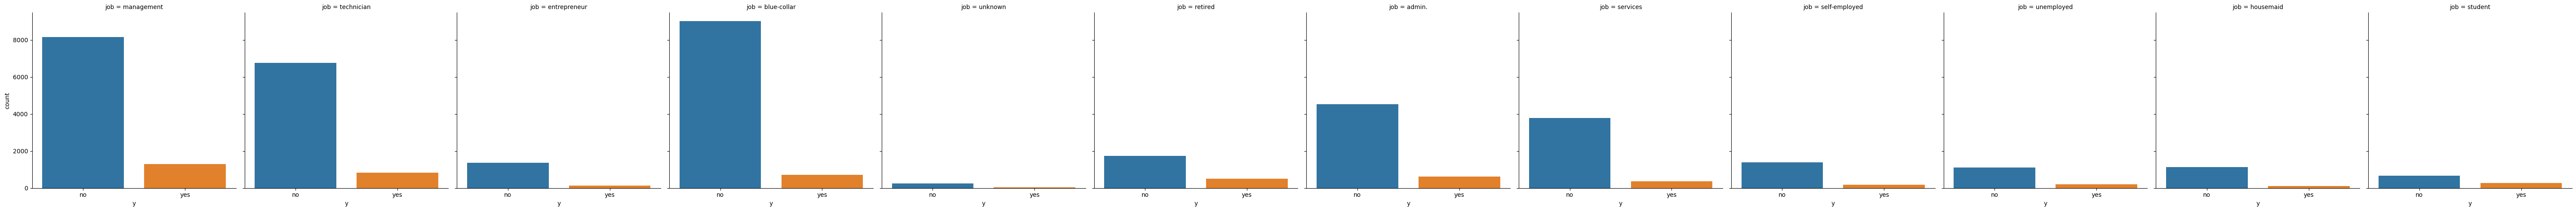

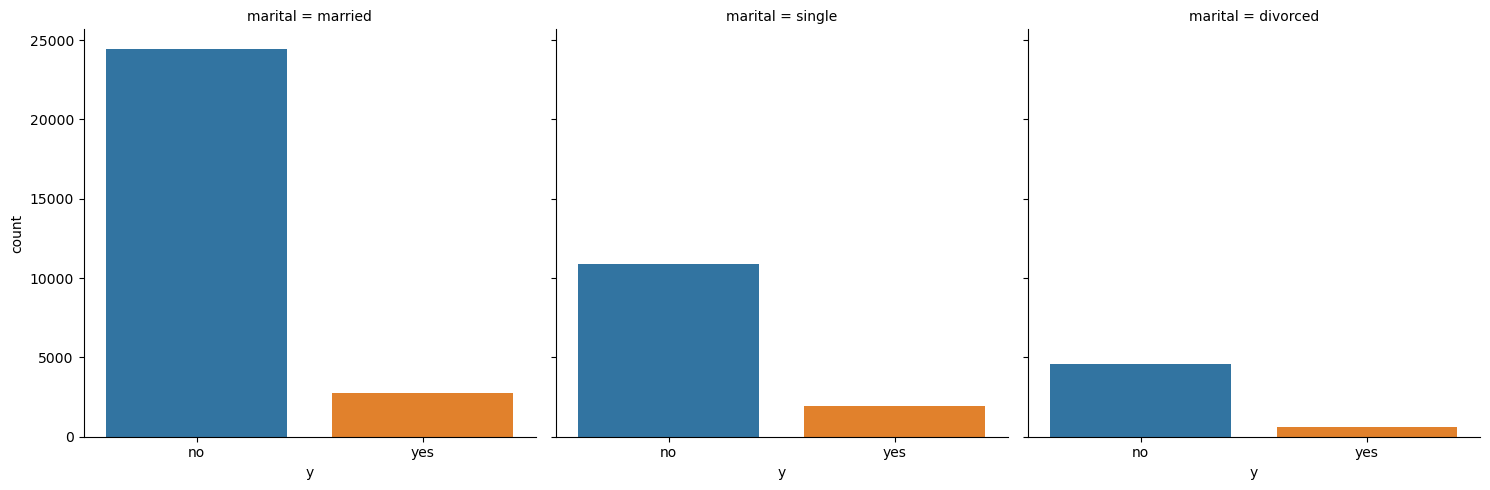

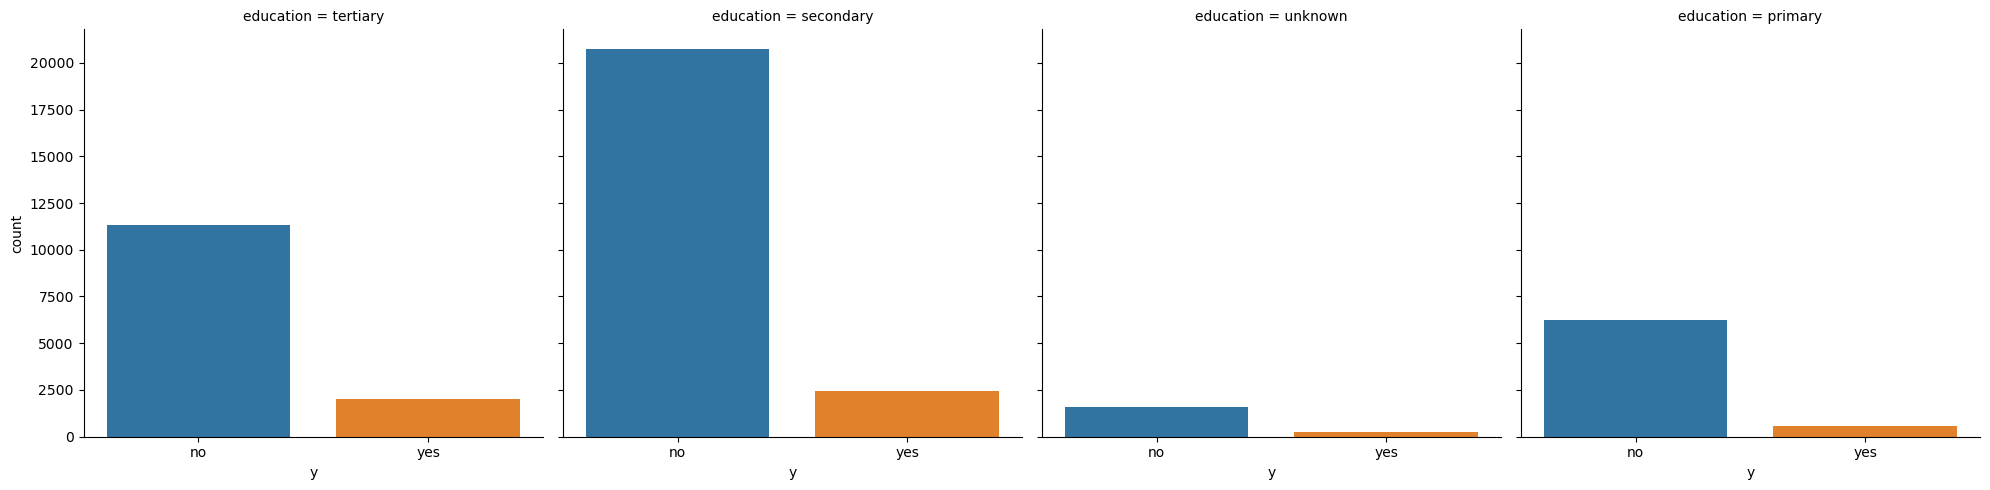

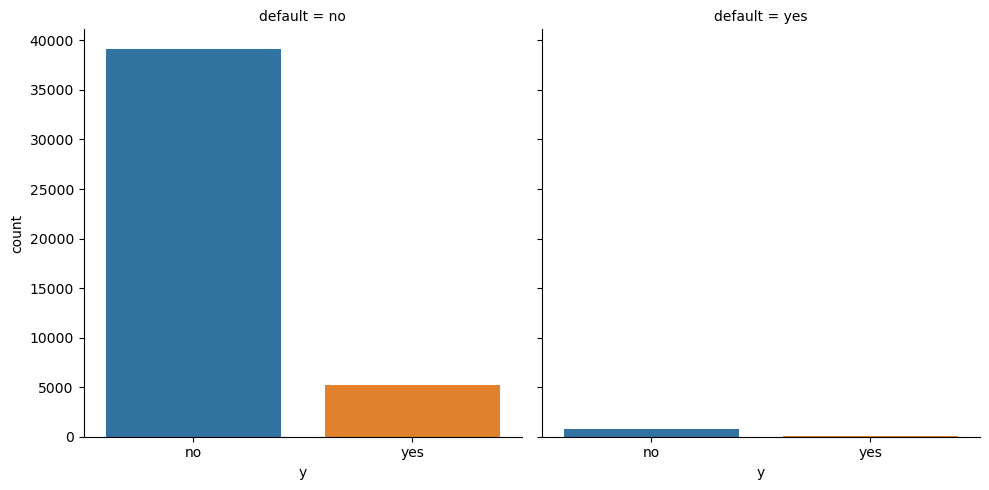

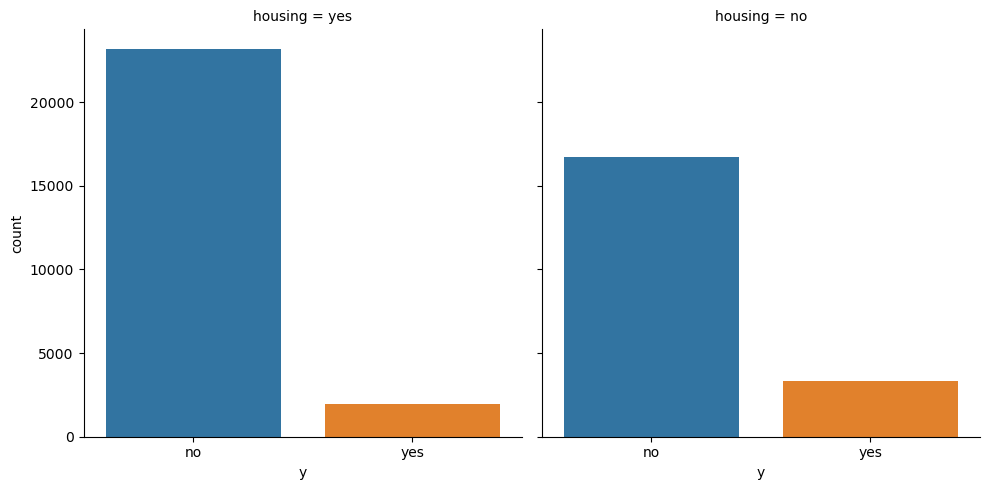

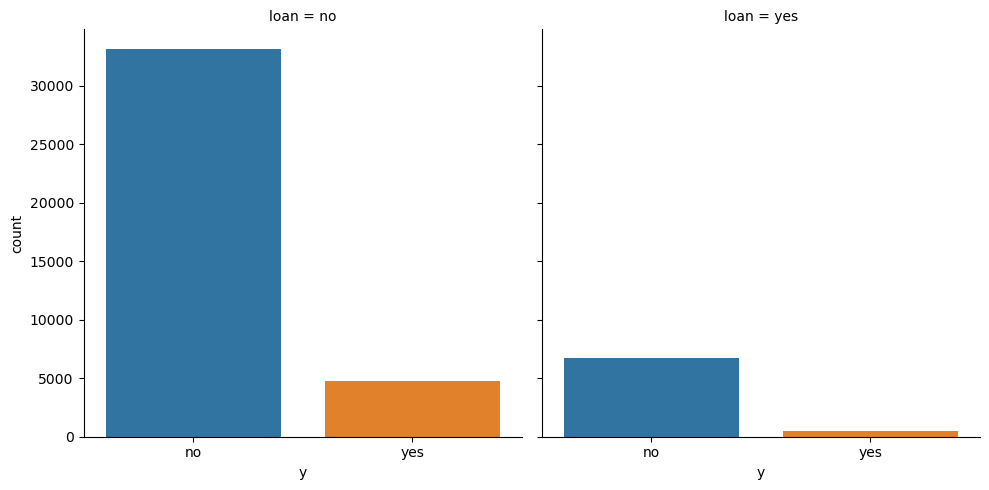

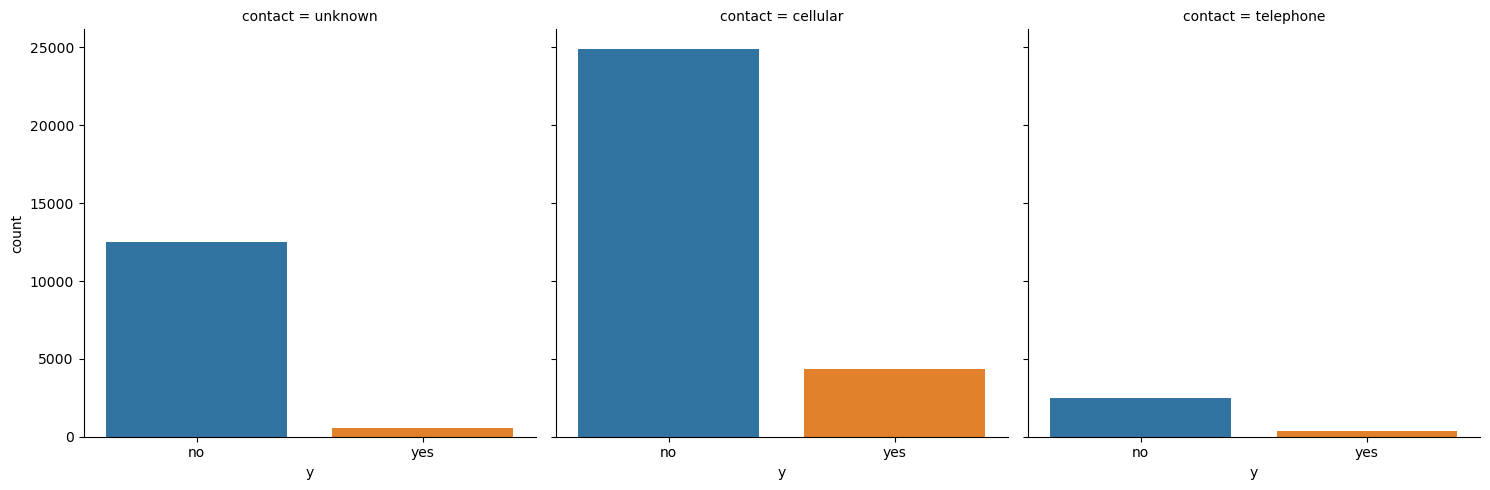

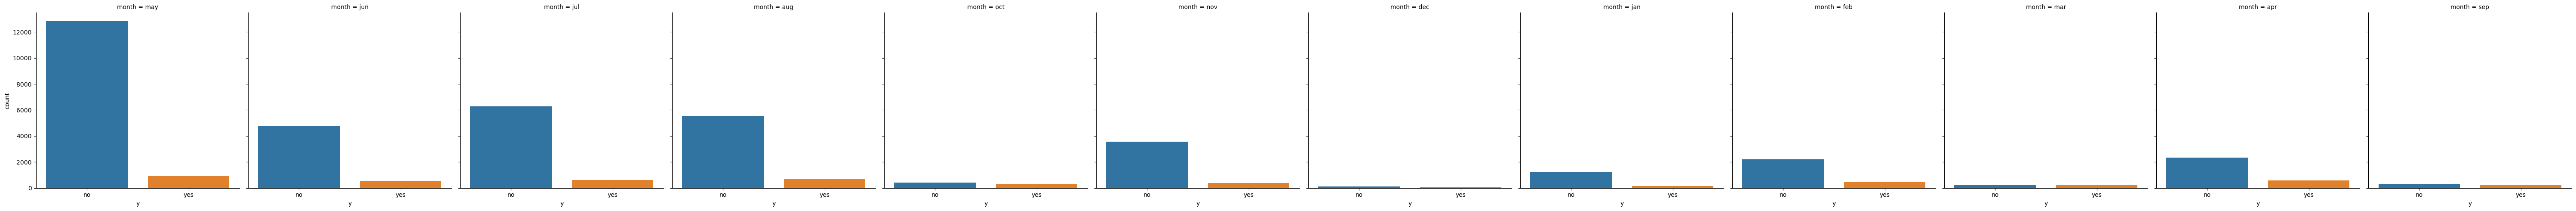

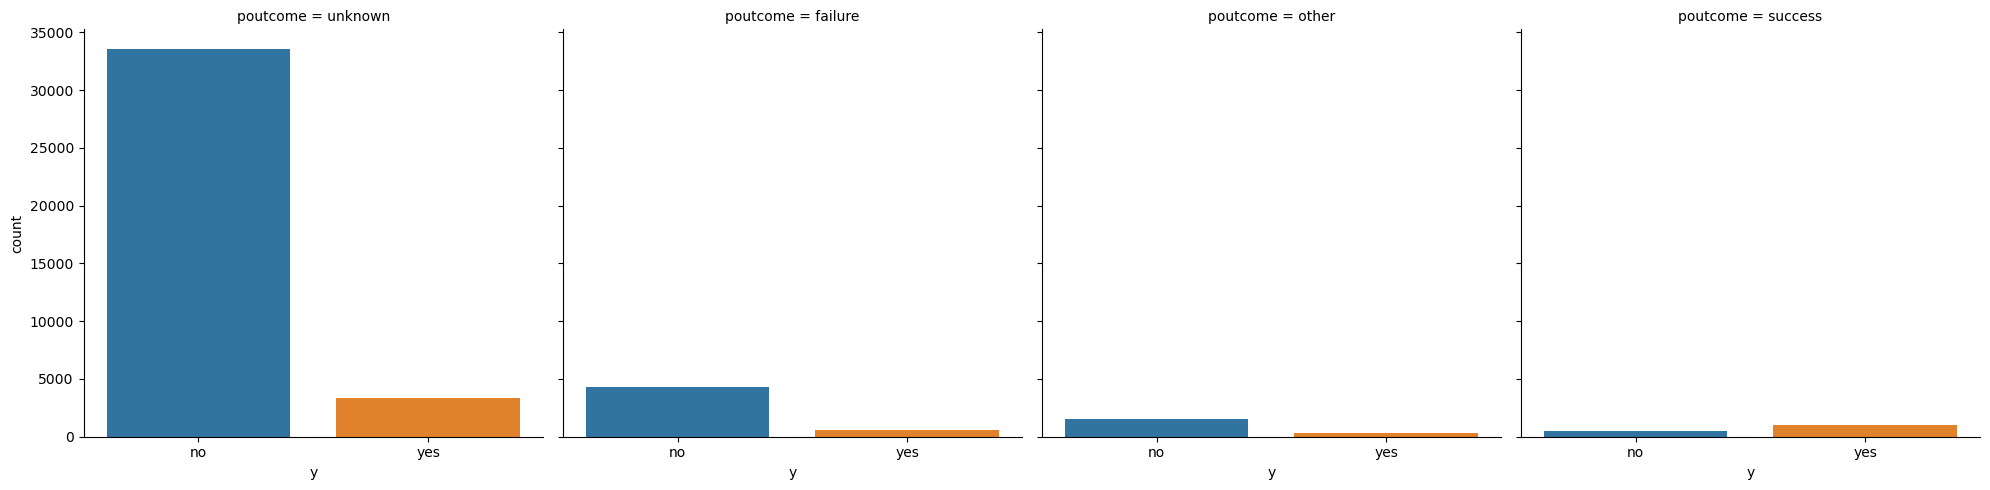

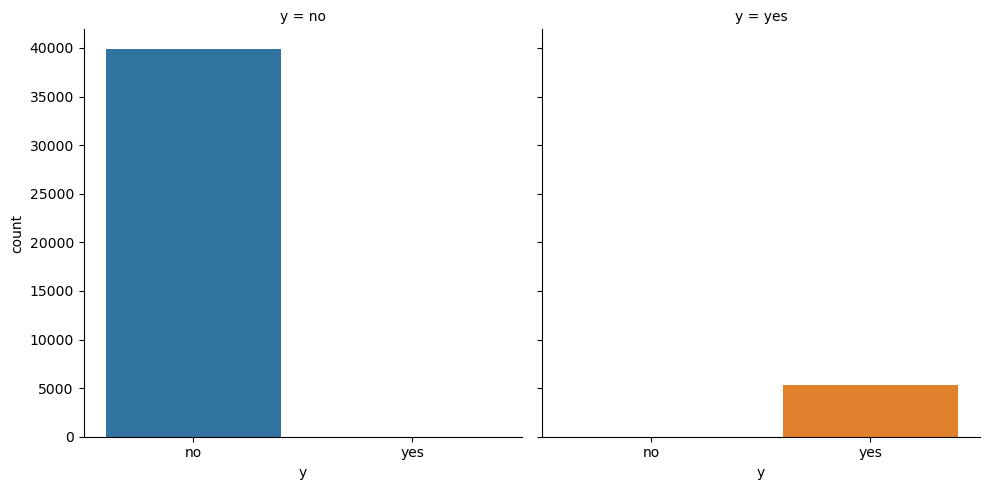

In [15]:
for df_cat in df_cat:
    sns.catplot(x='y', col=df_cat, kind='count' , data=df)
    plt.show()

1.the blue-collars are the most contacted but,the managment job type who told a yes to term deposit are more,compared to blue-collars.

2.the married ones are who mostly said yes to the term Deposit.

3.the education who studied secondary is called most and mostly 10% of them said yes to a term-deposit.

4.the persons who does not have credits in their bank are most contactes and most of them yes to the term deposit.

5.the persons who have housing loan is less taken term deposit compared to customer who does not have a housing loan.

6.the costomer who has personal loan did not take term deposit,the person who has a loan did not take term-deposit seriously.

7.most of the people who were bank contacted,most of them contain mobile phones,most of people updated to new technology.

8.the may month is most contacted and most term-deposits are taken on may month itself.

9.so,the costumers who took term-deposit from last campaign,most of them took the campaign again.(this costumer details are useful,helps us in buisness).

In [16]:
for df_cat in df_cat:
    print(df.groupby(['job',df_cat]).size())
    print('*********')
    print(df.groupby(['marital',df_cat]).size())
    print('*********')
    print(df.groupby(['education',df_cat]).size())
    print('*********')
    print(df.groupby(['default',df_cat]).size())
    print('*********')
    print(df.groupby(['housing',df_cat]).size())
    print('*********')
    print(df.groupby(['loan',df_cat]).size())
    print('*********')
    print(df.groupby(['contact',df_cat]).size())
    print('*********')
    print(df.groupby(['month',df_cat]).size())
    print('*********')
    print(df.groupby(['poutcome',df_cat]).size())

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
dtype: int64
*********
marital   y  
divorced  no      4585
          yes      622
married   no     24459
          yes     2755
single    no     10878
          yes     1912
dtype: int64
*********
education  y  
primary    no      6260
           yes      591
secondary  no     20752
           yes     2450
tertiary   no     11305


In [17]:
for df_cat in df_cat:
    print(df.groupby(['y',df_cat]).size())

y    y  
no   no     39922
yes  yes     5289
dtype: int64


In [18]:
df['y'].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

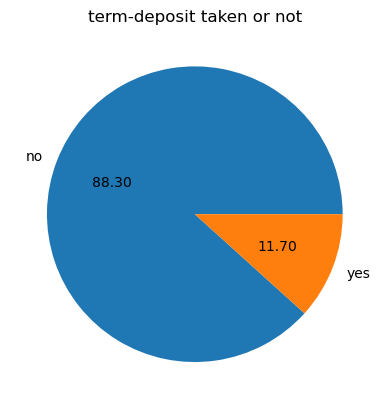

11.70% of the costumers (5289) have taken term-deposit, 88.30% of the costumers(39922) did not take the term-deposit.


In [19]:
plt.pie(labels=['no','yes'], x=df['y'].value_counts().values,autopct='%0.2f') #naming portions,using 
# placed or not data,%0.2f size of circle
plt.title('term-deposit taken or not') #title
plt.show()

print('11.70% of the costumers (5289) have taken term-deposit, 88.30% of the costumers(39922) did not take the term-deposit.')

# 7.explore the numerical features

In [20]:
df_num = df.select_dtypes(include='number') #fetches all the numeric values

In [21]:
df_num

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [22]:
# numeric datatypes that are (integer datatype)
df_num=[col for col in df.select_dtypes(include='integer').columns if (col not in ['y'])]
print(df_num)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# 8.find discrete numerical feature

In [23]:
discrete_feature = [feature for feature in df_num if len(df[feature].unique()<25)]
print("Discrete variables count: ()".format(len(discrete_feature)))

Discrete variables count: ()


# 9.relation between discrete numerical features and labels

In [24]:
# NA

# 10.find continous numerical features

In [25]:
continous_features=[df_num for feature in df_num if feature not in discrete_feature+['y']]
print("continous feature count {}".format(len(continous_features)))

continous feature count 0


# 11.distribution of continous numerical features

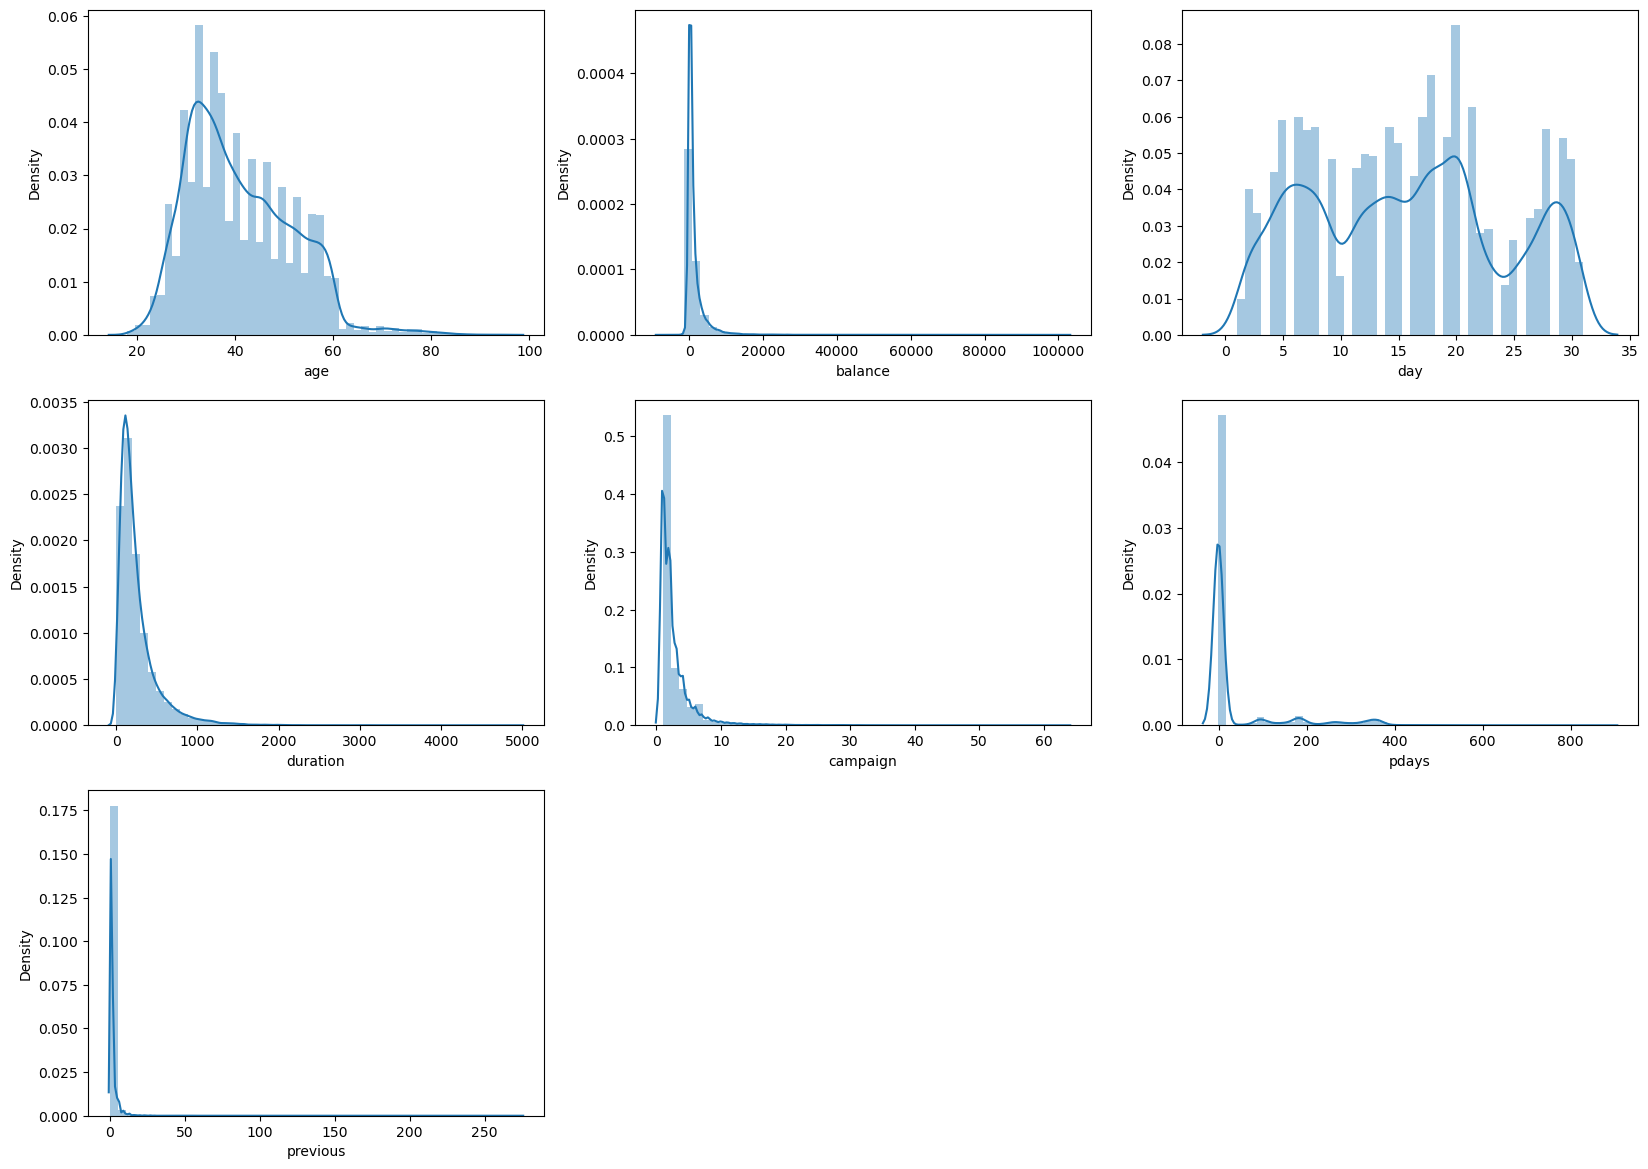

In [26]:
# plotting the numeric plots(numerical_data include number format)
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for df_num in df_num:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(df[df_num])
    plt.xlabel(df_num)
    plotnumber+=1
plt.show()

here we see:-

age and day are so close to normal distribution.

balance,duration,campaign,pdays,previous are right skewed and may have outliers.

# 12.relation between continous numerical features and labels

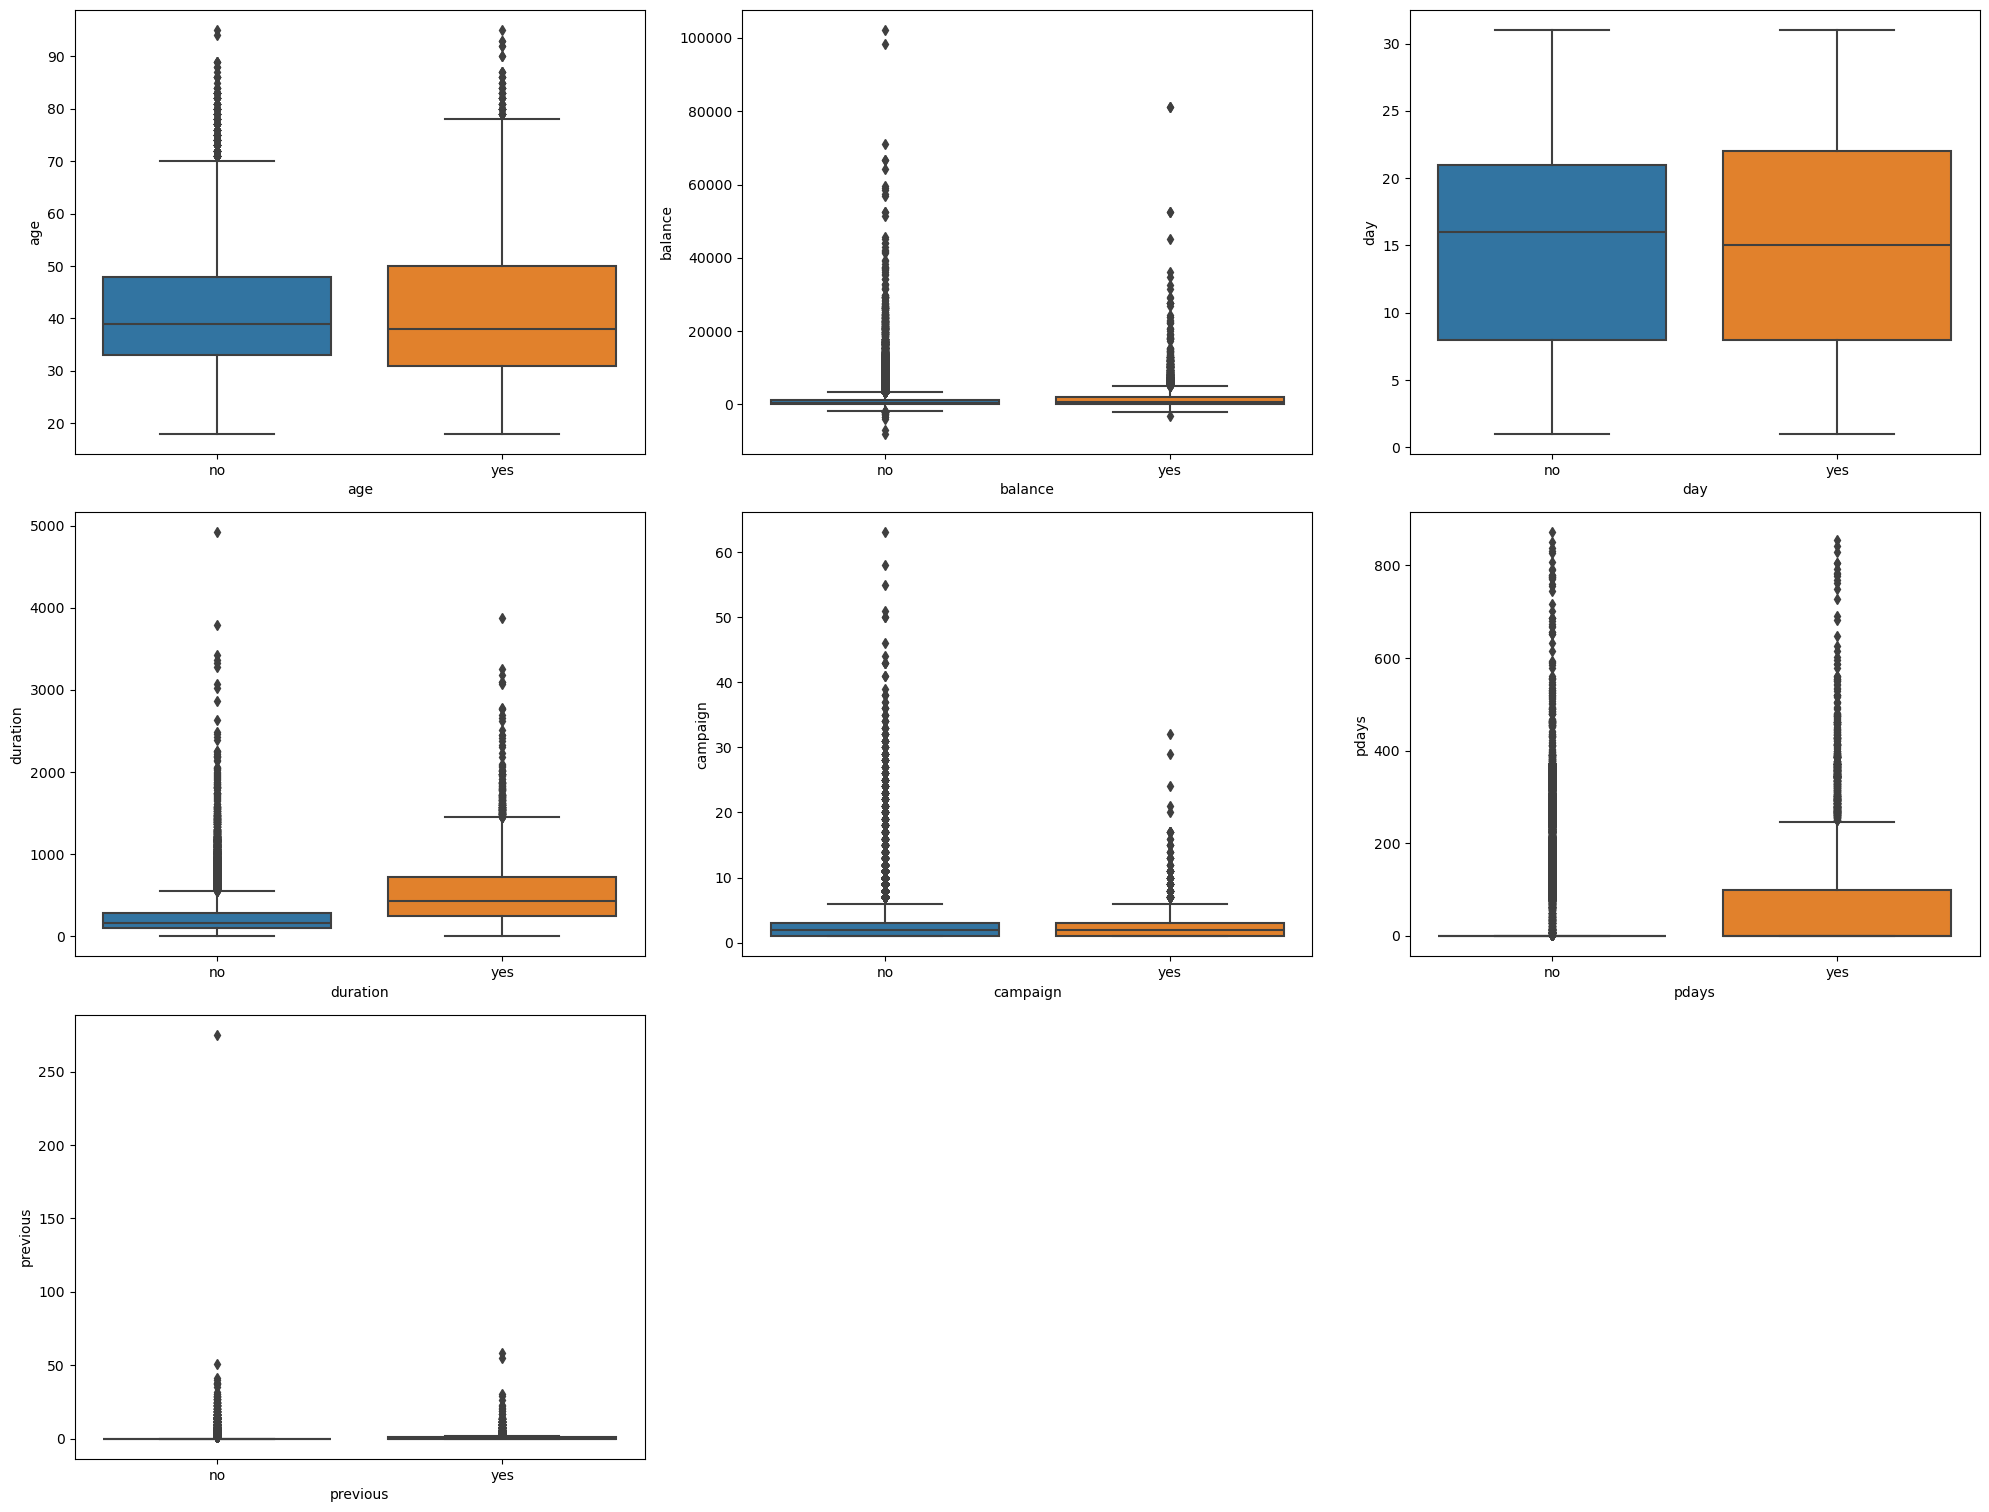

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1

for col in numerical_columns:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(x='y', y=col, data=df)
    plt.xlabel(col)
    plotnumber += 1

plt.tight_layout()
plt.show()


# 13.find outliers in numerical features

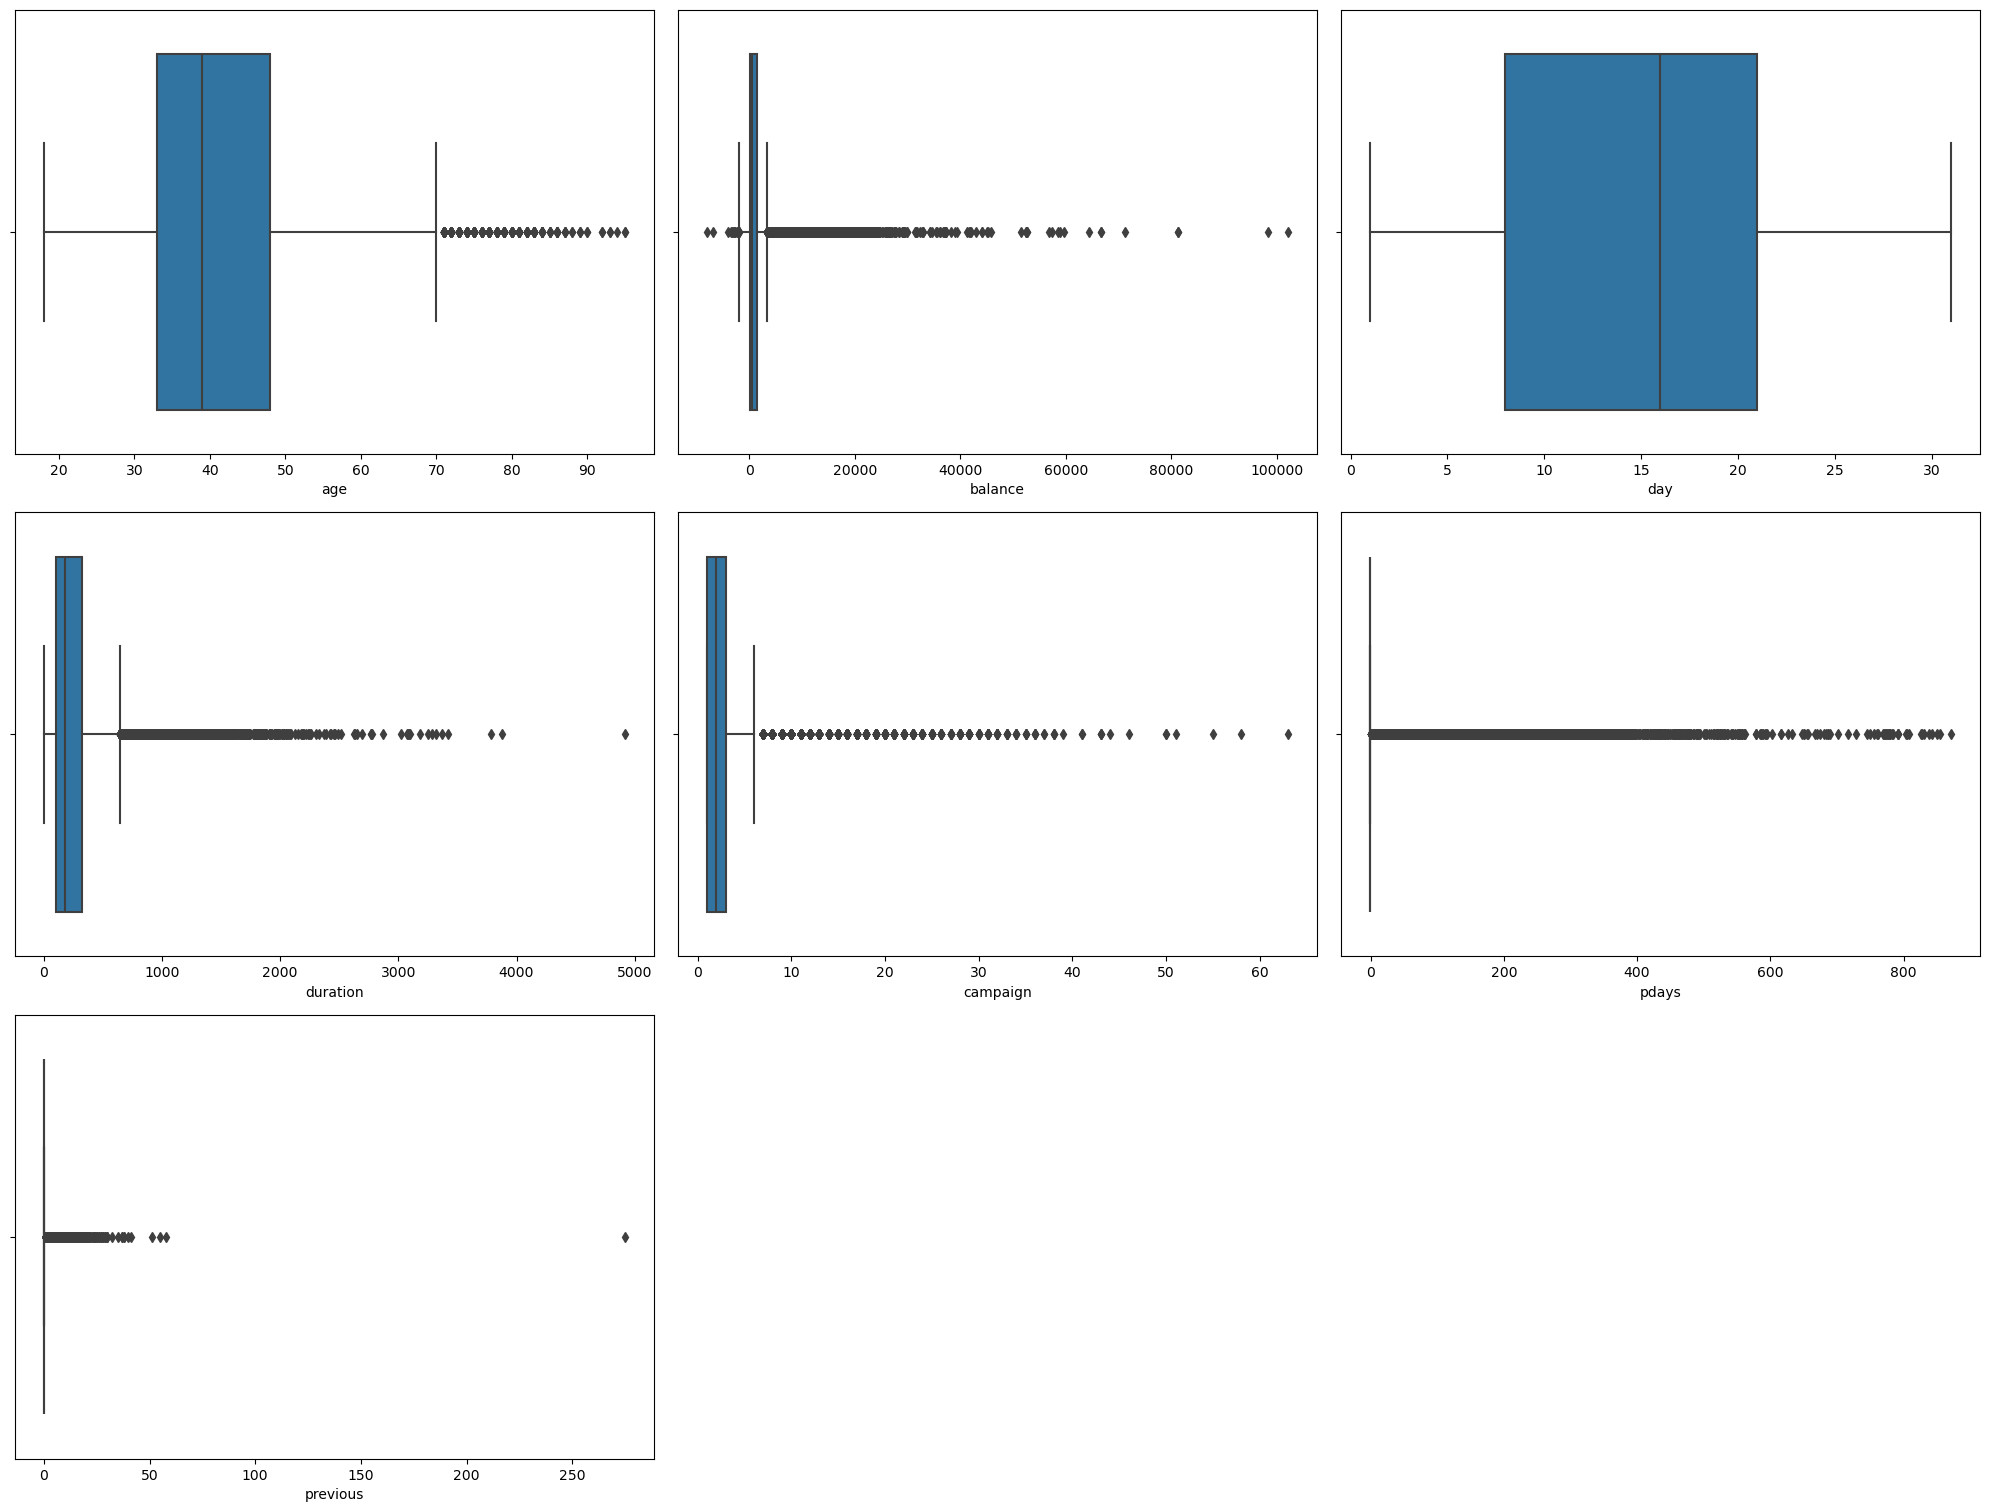

In [28]:
# box-plot(with individual dataset)
plt.figure(figsize=(20, 60), facecolor='white')

# List of numerical column names
df_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plotnumber = 1
for column in df_num:
    plt.subplot(12, 3, plotnumber)
    sns.boxplot(x=df[column])
    plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()  # Adjust layout for better spacing
plt.show()
 

so,age and day are considered to be normal distribution

there are no outliers in day,no need to worry about it

there are outliers in the age coloum but there is no age limit to take a deposit. 

# 14.explore co-relation between numerical features

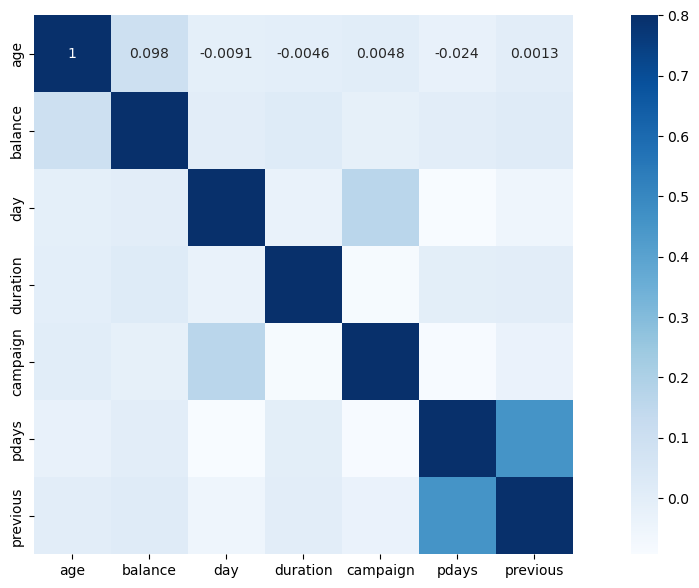

In [29]:
# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
co_relation_matrix = numerical_df.corr()

# Plot the heatmap
fig = plt.figure(figsize=(15, 7))
sns.heatmap(co_relation_matrix,vmax=0.8,square=True,cmap="Blues", annot=True)
plt.show()

# it seems no feature is heavily co-related with other features

# 15.find pair plot

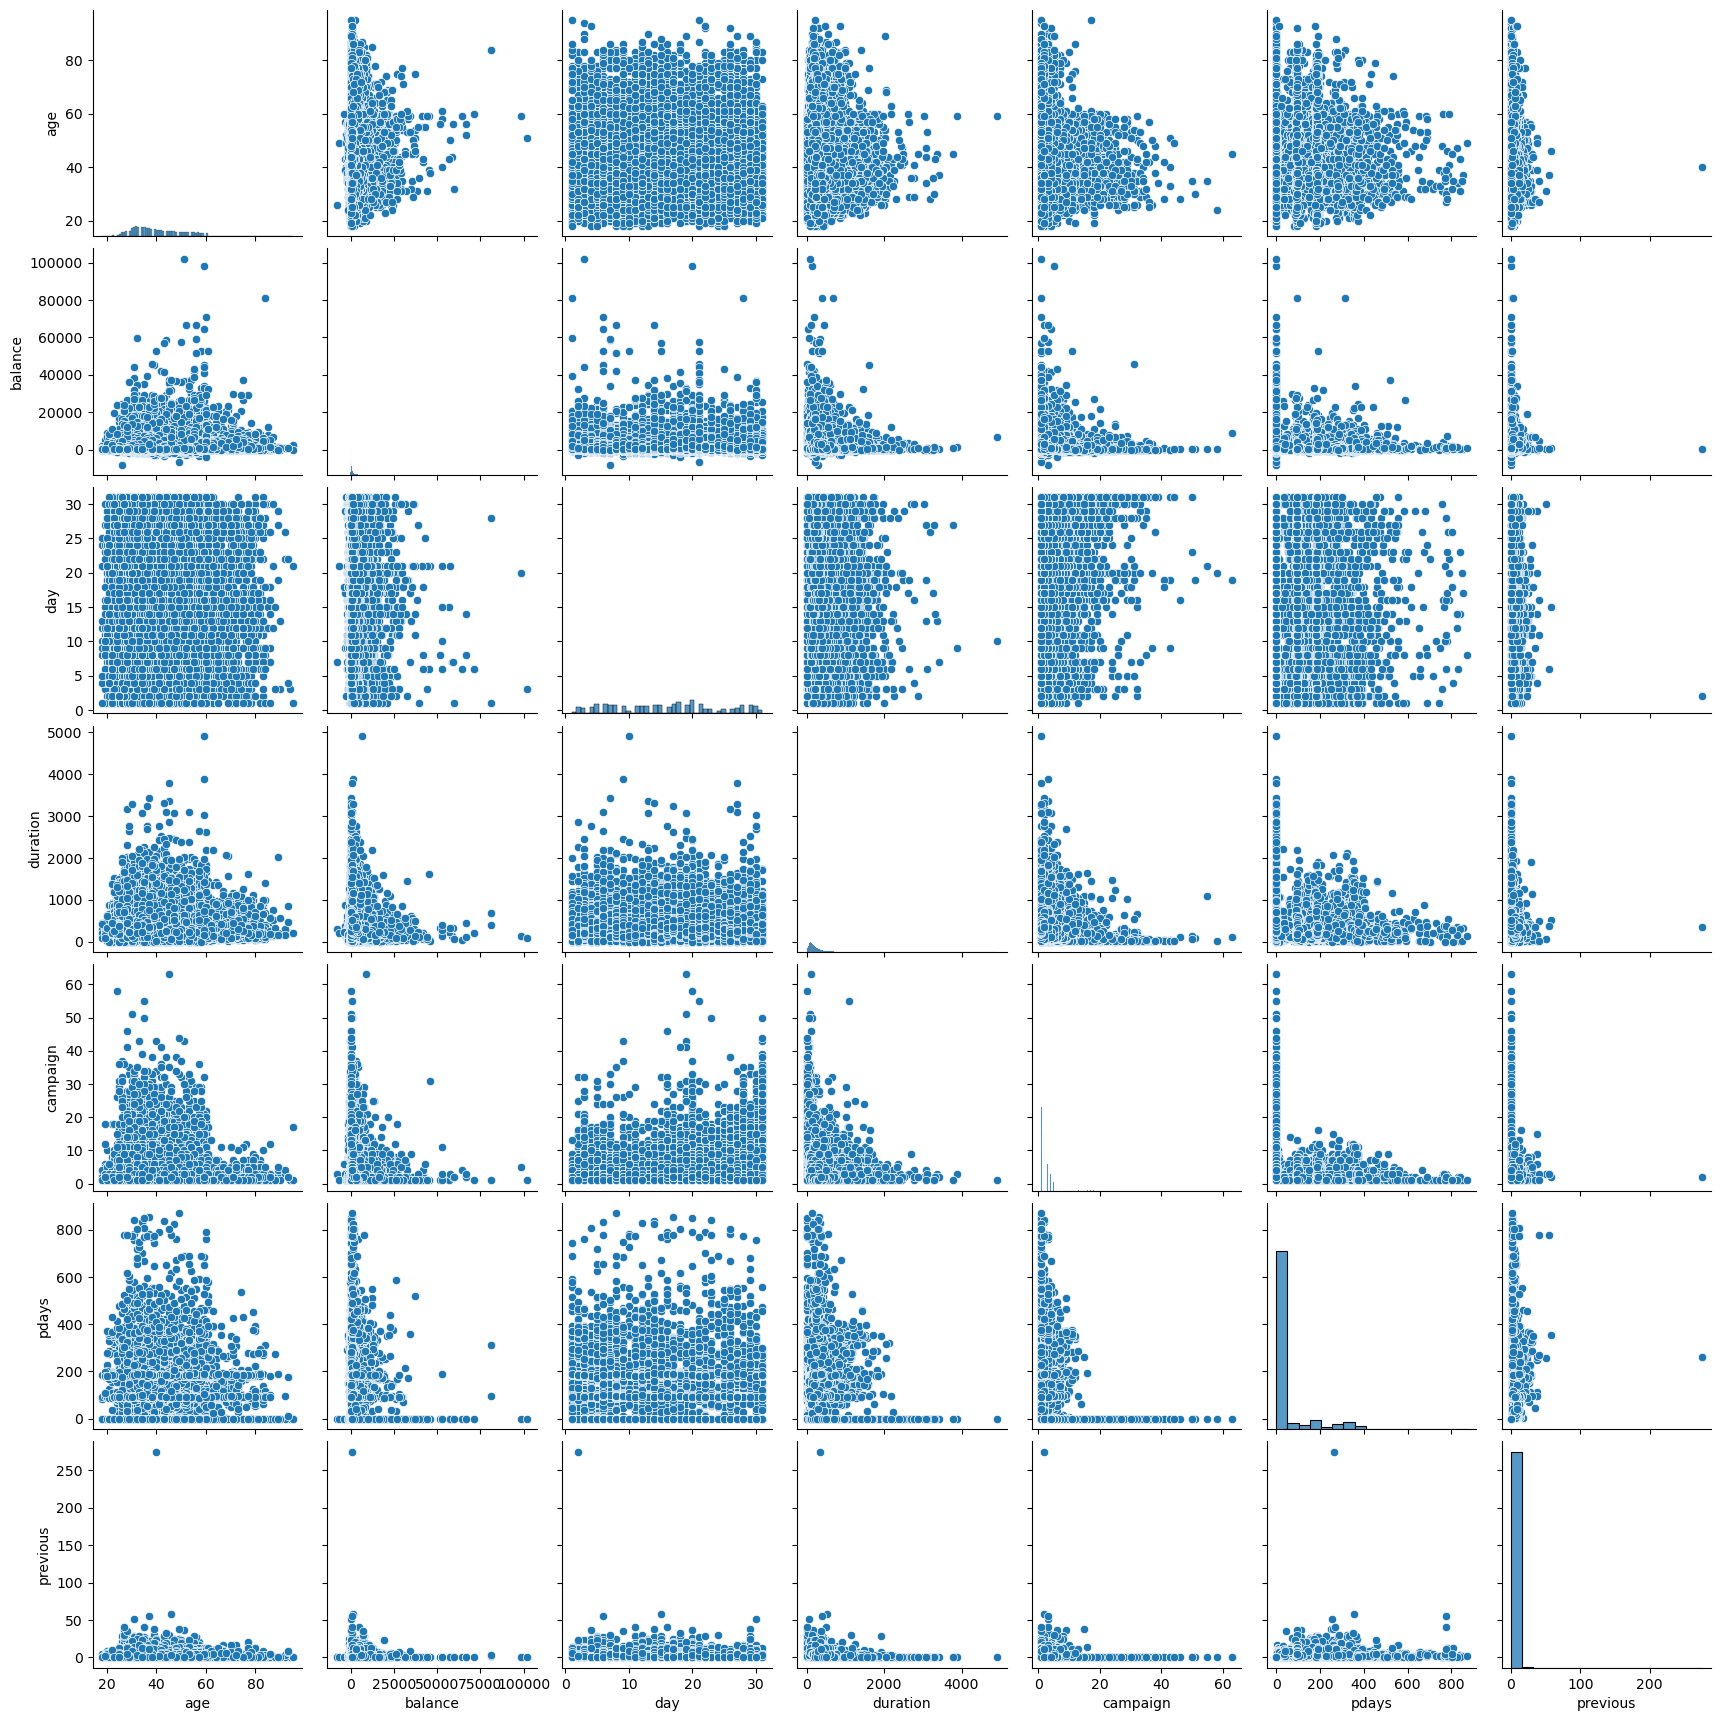

In [30]:
# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Plot pair plots for numerical variables
sns.pairplot(numerical_df)
plt.show()

In [31]:
# 16.check the data set is balanced or not based on target value is classification

Class Distribution:
y
no     0.883015
yes    0.116985
Name: count, dtype: float64


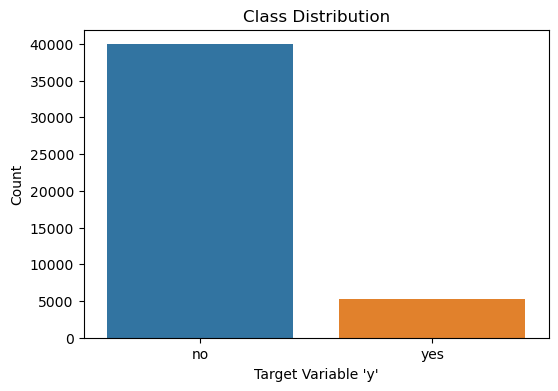

In [32]:
# Count the occurrences of each class in the target variable 'y'
class_counts = df['y'].value_counts()

# Calculate the class distribution
class_distribution = class_counts / df.shape[0]

print("Class Distribution:")
print(class_distribution)

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title("Class Distribution")
plt.xlabel("Target Variable 'y'")
plt.ylabel("Count")
plt.show()

From this we can understand that

To do machine learning the data should be in numerical form the target variable is underfit(should be balanced)

the data between yes and no ratio has much difference so,89% and 11% so the under sampling is used

the catagorical data should be converted into numerical data 

Class Distribution after Oversampling:
y
no     0.5
yes    0.5
Name: count, dtype: float64


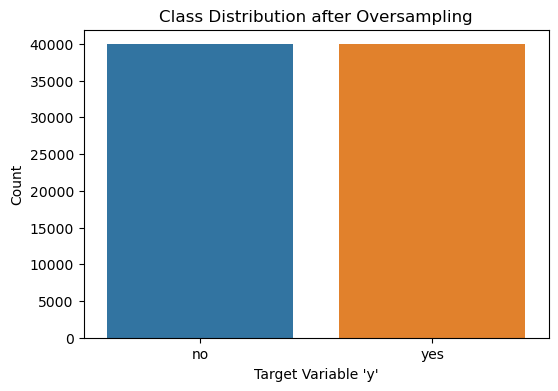

In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from imblearn.over_sampling import RandomOverSampler  # Importing RandomOverSampler for oversampling

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(df.drop(columns=['y']), df['y'])

# Concatenate the resampled features and target variable
df_resampler = pd.concat([X_resampled, y_resampled], axis=1)

# Display class distribution after oversampling
print("Class Distribution after Oversampling:")
print(df_resampler['y'].value_counts() / df_resampler.shape[0])

# Plot the class distribution after oversampling
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df_resampler)
plt.title("Class Distribution after Oversampling")
plt.xlabel("Target Variable 'y'")
plt.ylabel("Count")
plt.show()

it seems both the yes and no ratio is 50-50%(balanced dataset) and it can be proceed to model training

In [34]:
df_resampler['y'].value_counts(normalize=True)

y
no     0.5
yes    0.5
Name: proportion, dtype: float64

# feature engineering

In [35]:
df['default'].value_counts(normalize=True)

default
no     0.981973
yes    0.018027
Name: proportion, dtype: float64

more than 98% of the costumers has no credit,
we can remove the dataset

In [36]:
df.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [37]:
df['loan'].value_counts(normalize=True)
# this data is ok useful for data interpretation

loan
no     0.839774
yes    0.160226
Name: proportion, dtype: float64

In [38]:
dfcopy=df_resampler.copy()

In [39]:
dfcopy.head() #displays top 5 values

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [40]:
dfcopy.drop(['default'],axis=1,inplace=True)
dfcopy.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
dfcopy.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         8
      805         5
      828         3
      842         6
      854         7
Length: 914, dtype: int64

In [42]:
dfcopy['pdays'].value_counts(normalize=True)

pdays
-1      0.739605
 92     0.009907
 182    0.008103
 91     0.007928
 181    0.007402
          ...   
 745    0.000013
 756    0.000013
 411    0.000013
 416    0.000013
 530    0.000013
Name: proportion, Length: 559, dtype: float64

81% of the (-1) values are there in the dataset,thus this has outliers and feature will be removed.

In [43]:
dfcopy.drop(['pdays'],axis=1,inplace=True)

In [44]:
dfcopy.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,0,unknown,no


In [45]:
dfcopy.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019       1
     -6847       1
     -4057       1
     -3372       1
     -3313       1
                ..
yes   34646     12
      36252      4
      45248      4
      52587      8
      81204     13
Name: balance, Length: 9258, dtype: int64

Here, we observed: -
ostumersts with negative balancare notoeligiblept for Term deposi
t.
Clients with positive balanare eligibleopt for Term deposit.

In [46]:
dfcopy.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           15
                 ..
yes  3094         7
     3102         9
     3183         7
     3253         8
     3881         5
Name: duration, Length: 2627, dtype: int64

If the duration of contact is lesser, the chance of client investing in Term deposit is also lower.
If the duration of contact is higher, the chance of client investing in Term deposit is also higher.

In [47]:
dfcopy.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              6
     21              4
     24              9
     29             10
     32              6
Name: campaign, Length: 70, dtype: int64

Here we observed: -

If the number of contacts with client during a campaign are lesser, those clients have lesser chance of investing in Term Deposit.
If the number of contacts with client during a campaign are higher, those clients may have higher chance of investing in Term deposit.

In [48]:
categorical_columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome']
print(categorical_columns)

for categorical_column in categorical_columns:
    dfcopy=pd.concat([dfcopy.drop(categorical_column,axis=1),pd.get_dummies(dfcopy[categorical_column],prefix=categorical_column,prefix_sep='_',drop_first=True, dummy_na=False)],axis=1)

['job', 'marital', 'education', 'contact', 'month', 'poutcome']


In [49]:
boolean_columns=['housing','loan']
print(boolean_columns)

for boolean_column in boolean_columns:
    dfcopy[boolean_column+'_new']=dfcopy[boolean_column].apply(lambda x : 1 if x=='yes' else 0)
    dfcopy.drop(boolean_column,axis=1,inplace=True)

['housing', 'loan']


In [50]:
# Define the mapping function
def map_yes_no(value):
    return 1 if value == 'yes' else 0

# Apply the mapping function to create the new column 'y_new'
dfcopy['y_new'] = dfcopy['y'].apply(map_yes_no)

# Drop the original 'y' column
dfcopy.drop('y', axis=1, inplace=True)

In [51]:
dfcopy.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,y_new
0,58,2143,5,261,1,0,False,False,False,True,...,True,False,False,False,False,False,True,1,0,0
1,44,29,5,151,1,0,False,False,False,False,...,True,False,False,False,False,False,True,1,0,0
2,33,2,5,76,1,0,False,True,False,False,...,True,False,False,False,False,False,True,1,1,0
3,47,1506,5,92,1,0,True,False,False,False,...,True,False,False,False,False,False,True,1,0,0
4,33,1,5,198,1,0,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0


In [52]:
# Get all column names in dfcopy
column_names = dfcopy.columns.tolist()

print(column_names)

['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'housing_new', 'loan_new', 'y_new']


In [53]:
# List of columns to convert
# Define a lambda function to map True to 1 and False to 0
convert_to_int = lambda x: 1 if x else 0

columns_to_convert = ['job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services',
                      'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary',
                      'education_tertiary', 'education_unknown', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb',
                      'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
                      'poutcome_success', 'poutcome_unknown']

for col in columns_to_convert:
    dfcopy[col] = dfcopy[col].map(convert_to_int)

In [54]:
dfcopy.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,y_new
0,58,2143,5,261,1,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,33,2,5,76,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
3,47,1506,5,92,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


# Splitting the dataset into Training Set and Test Set

In [55]:
X=dfcopy.drop(['y_new'],axis=1)
#Target feature
y=dfcopy['y_new']

In [56]:
X

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new
0,58,2143,5,261,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
1,44,29,5,151,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,33,2,5,76,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,1
3,47,1506,5,92,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,33,1,5,198,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,53,1796,16,295,1,2,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
79840,43,0,14,1153,3,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
79841,38,536,22,248,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
79842,53,1004,13,393,1,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [57]:
y

0        0
1        0
2        0
3        0
4        0
        ..
79839    1
79840    1
79841    1
79842    1
79843    1
Name: y_new, Length: 79844, dtype: int64

In [58]:
y.value_counts()

y_new
0    39922
1    39922
Name: count, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)
#Scaling the independent variables

from sklearn.preprocessing import StandardScaler
standard_Scaler=StandardScaler()
x_train = standard_Scaler.fit_transform(X_train)   #fit generates the parameters, transform applies 
x_test = standard_Scaler.transform(X_test)

# logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


log_reg=LogisticRegression(random_state=10)
log_reg.fit(x_train,y_train)
y_pred_test=log_reg.predict(x_test)
y_pred_train=log_reg.predict(x_train)

print('Report for test data')
print(metrics.classification_report(y_test,y_pred_test))

print('Report for train data')
print(metrics.classification_report(y_train,y_pred_train))

Report for test data
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     10080
           1       0.84      0.82      0.83      9881

    accuracy                           0.84     19961
   macro avg       0.84      0.84      0.84     19961
weighted avg       0.84      0.84      0.84     19961

Report for train data
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     29842
           1       0.84      0.82      0.83     30041

    accuracy                           0.84     59883
   macro avg       0.84      0.84      0.84     59883
weighted avg       0.84      0.84      0.84     59883



# decision tree classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

fit_dt = DecisionTreeClassifier(random_state=17)

param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

cv_dt = GridSearchCV(fit_dt, cv = 15,
                     param_grid=param_dist)

cv_dt.fit(x_train, y_train)

print(cv_dt.best_score_)

y_pred=cv_dt.predict(x_test)

accuracy_score = accuracy_score(y_test,y_pred)
print('Accuracy Score for model for test data is: ',accuracy_score)

0.8167761016648875
Accuracy Score for model for test data is:  0.8172937227593808


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81     10080
           1       0.79      0.85      0.82      9881

    accuracy                           0.82     19961
   macro avg       0.82      0.82      0.82     19961
weighted avg       0.82      0.82      0.82     19961



In [65]:
y_pred_train=cv_dt.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81     29842
           1       0.80      0.85      0.82     30041

    accuracy                           0.82     59883
   macro avg       0.82      0.82      0.82     59883
weighted avg       0.82      0.82      0.82     59883



# random forest

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor

fit_rf = RandomForestClassifier(random_state=3)

In [67]:
# Providing the different values of hyperparameters
param_dist = {'max_depth': [2, 3, 4,6,8],
              'max_features': ['auto', 'sqrt'],
              'criterion': ['gini', 'entropy'],
             'oob_score' : [True, False],
             'n_estimators':[10,15,20,25,30]}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv =5,
                     param_grid=param_dist)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)   #to get best Hyperparameters

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 30, 'oob_score': True}


In [68]:
y_pred = cv_rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85     10080
           1       0.83      0.89      0.86      9881

    accuracy                           0.86     19961
   macro avg       0.86      0.86      0.86     19961
weighted avg       0.86      0.86      0.86     19961



In [69]:
y_pred_train=cv_rf.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85     29842
           1       0.84      0.89      0.87     30041

    accuracy                           0.86     59883
   macro avg       0.86      0.86      0.86     59883
weighted avg       0.86      0.86      0.86     59883



# gaussion NB

In [70]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_test_predict = classifier.predict(x_test)
y_train_predict = classifier.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76     10080
           1       0.83      0.53      0.65      9881

    accuracy                           0.71     19961
   macro avg       0.74      0.71      0.70     19961
weighted avg       0.74      0.71      0.70     19961

              precision    recall  f1-score   support

           0       0.65      0.90      0.75     29842
           1       0.84      0.52      0.64     30041

    accuracy                           0.71     59883
   macro avg       0.74      0.71      0.70     59883
weighted avg       0.74      0.71      0.70     59883



In [71]:
# K nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

error = []

# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=5)
    error.append(1-score.mean())
    
# k = 1, accuracy rate = 0.3
# k = 2, accuracy rate = .5

Text(0, 0.5, 'Accuracy Rate')

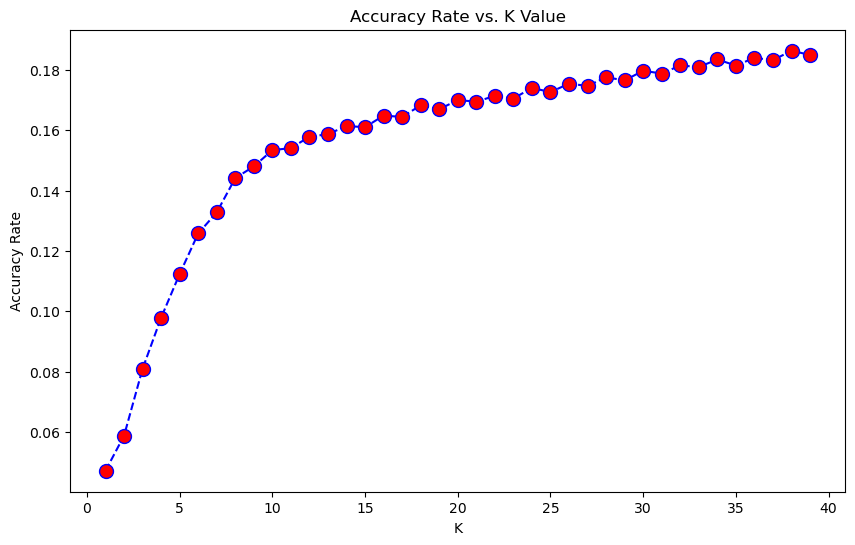

In [72]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [73]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[8271 1809]
 [1338 8543]]


              precision    recall  f1-score   support

           0       0.86      0.82      0.84     10080
           1       0.83      0.86      0.84      9881

    accuracy                           0.84     19961
   macro avg       0.84      0.84      0.84     19961
weighted avg       0.84      0.84      0.84     19961



In [ ]:
cv_dt.best_params_

# the model produces accuracy with 75%,82%,85%,87% ranges in both testing and training and testing parts respectively

# so the model has good performance and good accuracy rate.

# END OF THE PROGRAM